In [87]:
import random
import math as m
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
def cost_function(X):
    X = np.array(X)
    error = np.sum(X ** 2)
    return error

In [126]:
class Particle():
    def __init__(self, x0):         #x0 is particle position
        self.pos_i = list()
        self.v_i = []
        self.best_pos_i = []
        self.best_err_i = -1
        self.err_i = -1
        
        for i in range(num_dimensions):
            self.v_i.append(np.random.uniform(-1, 1))
            self.pos_i.append(x0[i])
            
            
    def evaluate(self, costfunc):
        self.err_i = costfunc(self.pos_i)
        
        #check if this is best indivisual position
        if self.err_i < self.best_err_i or self.best_err_i == -1:
            self.best_pos_i = self.pos_i
            self.best_err_i = self.err_i
            
            
    def update_velocity(self, best_pos_g):
        w = 0.2
        c1 = 1 # cognitive constant
        c2 = 2 # social constant
        
        for i in range(num_dimensions):
            r1 = np.random.random()
            r2 = np.random.random()
            
            #update vel_cognitive and vel_social
            vel_cog = c1 * c2 * (self.best_pos_i[i] - self.pos_i[i])
            vel_soc = c2 * r2 * (best_pos_g[i] - self.pos_i[i])
            
            self.v_i[i] = vel_cog + vel_soc + w * self.v_i[i]
            
    def update_position(self, bounds):
        # bounds specify max or min position
        # bounds is [min_pos, max_pos]
        
        for i in range(num_dimensions):
            self.pos_i[i] += self.v_i[i]
            
            if self.pos_i[i] > bounds[i][1]:
                self.pos_i[i] = bounds[i][i]
                
            if self.pos_i[i] < bounds[i][0]:
                self.pos_i[i] = bounds[i][0]
                

In [124]:
class PSO():
    def __init__(self, costfunc, x0, bounds, num_particles, maxiter):
        global num_dimensions
        
        num_dimensions = len(x0)
        best_err_g = -1
        best_pos_g = []
        
        # creating swarm
        swarm = []
        for i in range(num_particles):
            swarm.append(Particle(x0))
            
        #optimization
        i = 0
        while i < maxiter:
            for j in range(num_particles):
                swarm[j].evaluate(costfunc)
                
                if swarm[j].err_i < best_err_g or best_err_g == -1:
                    best_err_g = swarm[j].err_i
                    best_pos_g = swarm[j].pos_i

            # update vel and pos
            for j in range(num_particles):
                swarm[j].update_velocity(best_pos_g)
                swarm[j].update_position(bounds)
                
                plt.plot(i , swarm[j].pos_i[0])
                plt.plot(i, swarm[j].pos_i[1])
            
                
            i += 1
            
            plt.plot(i , best_pos_g[0], 'r.')
            plt.plot(i, best_pos_g[1], 'b.')
            
            print(best_err_g, best_pos_g)
    plt.show()

50 [4.850374627302868, 5.15056963051169]
46.67686408667333 [4.685701908148534, 4.906562290917258]
42.79523181325247 [4.3430873843389834, 4.720029005136928]
37.675599882080455 [3.9927467684232236, 4.453067991824638]
33.35907807096373 [3.6247763494343648, 4.390533106438451]
27.85584272097662 [2.794062202492837, 4.2197339294594265]
20.54049796699815 [1.3632142361234627, 4.148260562631742]
17.15022386834342 [-0.880853215395379, 4.144437213976929]
17.08375904761422 [-0.421382446904606, 4.131981076589591]
17.08375904761422 [-0.4909225478025395, 4.1318585681274325]
17.044310930329463 [0.19960987227456803, 4.128602269135741]
17.044310930329463 [0.24072972459562716, 4.128628468228247]
17.001123236287135 [-0.20710139039084727, 4.112631912790352]
16.84656618538085 [0.11224834904922731, 4.096227541469711]
16.72289293000978 [-0.05535259283401843, 4.084603126784023]
16.566658114867508 [-0.07469140823184925, 4.060349541130224]
16.224882268168386 [-0.1601456841324764, 4.013028597979945]
15.93538979821

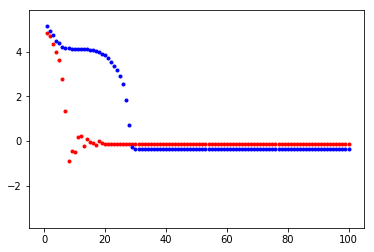

In [125]:
initial = [5, 5]
bounds = [(-10, 10), (-10, 10)]
PSO(cost_function, initial, bounds, num_particles=15, maxiter=100)